In [190]:
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Dense, GRU, Conv1D, MaxPooling1D, Flatten

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

In [191]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# GENERAL TWEETS DATA

In [192]:
# re-reading the stock_data into pandas dataframe
stock_data = pd.read_csv('/content/drive/MyDrive/JU PROJ/ETHEREUM/GENERAL_FINBERT_ETH_data.csv', index_col = False)

# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)
stock_data

,Date,Close,negative,neutral,positive,Open,High,Low,Volume
0,2017-11-09,320.884003,0.053951,0.018585,0.927464,308.644989,329.451996,307.056000,893249984
1,2017-11-10,299.252991,0.045446,0.023193,0.931362,320.670990,324.717987,294.541992,885985984
2,2017-11-11,314.681000,0.045446,0.023193,0.931362,298.585999,319.453003,298.191986,842300992
3,2017-11-12,307.907990,0.037661,0.029538,0.932801,314.690002,319.153015,298.513000,1613479936
4,2017-11-13,316.716003,0.396750,0.187187,0.416063,307.024994,328.415009,307.024994,1041889984
...,...,...,...,...,...,...,...,...,...
1636,2022-05-03,2783.476318,0.148082,0.017295,0.834623,2857.152344,2859.193359,2762.118652,13026093219
1637,2022-05-04,2940.644775,0.148082,0.017295,0.834623,2783.131104,2956.686768,2779.273682,18186749944
1638,2022-05-05,2749.213135,0.150205,0.025175,0.824620,2940.226562,2948.960693,2704.916260,22642925048
1639,2022-05-06,2694.979736,0.150205,0.025175,0.824620,2748.931641,2754.837646,2645.335205,21027599270


In [193]:
stock_data = stock_data.loc[(stock_data['Date'] >= '2018-02-15')]
stock_data

,Date,Close,negative,neutral,positive,Open,High,Low,Volume
98,2018-02-15,936.976013,0.057235,0.030338,0.912427,923.728027,951.947998,911.111023,2900100096
99,2018-02-16,944.210022,0.057235,0.030338,0.912427,934.786011,950.005005,917.848022,2369449984
100,2018-02-17,974.114990,0.032487,0.041397,0.926115,944.747986,976.594971,940.754028,2525720064
101,2018-02-18,923.921021,0.032487,0.041397,0.926115,973.348999,982.932983,915.445007,2567290112
102,2018-02-19,943.864990,0.272611,0.056672,0.670717,921.668030,957.776978,921.554016,2169019904
...,...,...,...,...,...,...,...,...,...
1636,2022-05-03,2783.476318,0.148082,0.017295,0.834623,2857.152344,2859.193359,2762.118652,13026093219
1637,2022-05-04,2940.644775,0.148082,0.017295,0.834623,2783.131104,2956.686768,2779.273682,18186749944
1638,2022-05-05,2749.213135,0.150205,0.025175,0.824620,2940.226562,2948.960693,2704.916260,22642925048
1639,2022-05-06,2694.979736,0.150205,0.025175,0.824620,2748.931641,2754.837646,2645.335205,21027599270


In [194]:
# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2018-02-15,936.976013,0.057235,0.030338,0.912427,923.728027,951.947998,911.111023,2900100096
2018-02-16,944.210022,0.057235,0.030338,0.912427,934.786011,950.005005,917.848022,2369449984
2018-02-17,974.114990,0.032487,0.041397,0.926115,944.747986,976.594971,940.754028,2525720064
2018-02-18,923.921021,0.032487,0.041397,0.926115,973.348999,982.932983,915.445007,2567290112
2018-02-19,943.864990,0.272611,0.056672,0.670717,921.668030,957.776978,921.554016,2169019904
...,...,...,...,...,...,...,...,...
2022-05-03,2783.476318,0.148082,0.017295,0.834623,2857.152344,2859.193359,2762.118652,13026093219
2022-05-04,2940.644775,0.148082,0.017295,0.834623,2783.131104,2956.686768,2779.273682,18186749944
2022-05-05,2749.213135,0.150205,0.025175,0.824620,2940.226562,2948.960693,2704.916260,22642925048


In [195]:
stock_data.shape

(1543, 8)

In [196]:
stock_data.isna().sum()

Close       0
negative    8
neutral     8
positive    8
Open        0
High        0
Low         0
Volume      0
dtype: int64

In [197]:
stock_data['negative'] = stock_data['negative'].interpolate(option='spline')
stock_data['positive'] = stock_data['positive'].interpolate(option='spline')
stock_data['neutral'] = stock_data['neutral'].interpolate(option='spline')
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2018-02-15,936.976013,0.057235,0.030338,0.912427,923.728027,951.947998,911.111023,2900100096
2018-02-16,944.210022,0.057235,0.030338,0.912427,934.786011,950.005005,917.848022,2369449984
2018-02-17,974.114990,0.032487,0.041397,0.926115,944.747986,976.594971,940.754028,2525720064
2018-02-18,923.921021,0.032487,0.041397,0.926115,973.348999,982.932983,915.445007,2567290112
2018-02-19,943.864990,0.272611,0.056672,0.670717,921.668030,957.776978,921.554016,2169019904
...,...,...,...,...,...,...,...,...
2022-05-03,2783.476318,0.148082,0.017295,0.834623,2857.152344,2859.193359,2762.118652,13026093219
2022-05-04,2940.644775,0.148082,0.017295,0.834623,2783.131104,2956.686768,2779.273682,18186749944
2022-05-05,2749.213135,0.150205,0.025175,0.824620,2940.226562,2948.960693,2704.916260,22642925048


In [198]:
stock_data.isna().sum()

Close       0
negative    0
neutral     0
positive    0
Open        0
High        0
Low         0
Volume      0
dtype: int64

In [199]:
stock_data = stock_data.dropna()

In [200]:
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2018-02-15,936.976013,0.057235,0.030338,0.912427,923.728027,951.947998,911.111023,2900100096
2018-02-16,944.210022,0.057235,0.030338,0.912427,934.786011,950.005005,917.848022,2369449984
2018-02-17,974.114990,0.032487,0.041397,0.926115,944.747986,976.594971,940.754028,2525720064
2018-02-18,923.921021,0.032487,0.041397,0.926115,973.348999,982.932983,915.445007,2567290112
2018-02-19,943.864990,0.272611,0.056672,0.670717,921.668030,957.776978,921.554016,2169019904
...,...,...,...,...,...,...,...,...
2022-05-03,2783.476318,0.148082,0.017295,0.834623,2857.152344,2859.193359,2762.118652,13026093219
2022-05-04,2940.644775,0.148082,0.017295,0.834623,2783.131104,2956.686768,2779.273682,18186749944
2022-05-05,2749.213135,0.150205,0.025175,0.824620,2940.226562,2948.960693,2704.916260,22642925048


In [201]:
stock_data.describe(include='all')

,Close,negative,neutral,positive,Open,High,Low,Volume
count,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1.543000e+03
mean,1101.638880,0.088561,0.063203,0.848236,1100.759775,1136.058144,1060.806980,1.314982e+10
std,1293.471415,0.052406,0.054305,0.070241,1293.427971,1333.445573,1247.471998,1.119144e+10
min,84.308296,0.022175,0.011471,0.262185,84.279694,85.342743,82.829887,9.484880e+08
25%,190.103821,0.050084,0.029348,0.811553,190.099060,196.909904,185.587364,4.485708e+09
50%,381.190765,0.075523,0.040577,0.867407,381.971466,391.464722,369.336334,1.064592e+10
75%,1990.353577,0.110592,0.078702,0.902299,1985.301147,2043.823425,1904.431458,1.846191e+10
max,4812.087402,0.418884,0.433785,0.946941,4810.071289,4891.704590,4718.039062,8.448291e+10


In [202]:
stock_data= stock_data.astype({"Volume":'float'})

In [203]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1543 entries, 2018-02-15 to 2022-05-07
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     1543 non-null   float64
 1   negative  1543 non-null   float64
 2   neutral   1543 non-null   float64
 3   positive  1543 non-null   float64
 4   Open      1543 non-null   float64
 5   High      1543 non-null   float64
 6   Low       1543 non-null   float64
 7   Volume    1543 non-null   float64
dtypes: float64(8)
memory usage: 108.5+ KB


In [204]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 1233
Number of records in Test Data: 310


In [205]:
stock_data['Close_EWMA3'] = stock_data['Close'].ewm(span=3, adjust=False).mean()
stock_data['Close_EWMA7'] = stock_data['Close'].ewm(span=7, adjust=False).mean()
stock_data['Close_EWMA14'] = stock_data['Close'].ewm(span=14, adjust=False).mean()
stock_data['Close_EWMA30'] = stock_data['Close'].ewm(span=30, adjust=False).mean()

stock_data['pos_EWMA3'] = stock_data['positive'].ewm(span=3, adjust=False).mean()
stock_data['pos_EWMA7'] = stock_data['positive'].ewm(span=7, adjust=False).mean()
stock_data['pos_EWMA14'] = stock_data['positive'].ewm(span=14, adjust=False).mean()
stock_data['pos_EWMA30'] = stock_data['positive'].ewm(span=30, adjust=False).mean()

stock_data['neu_EWMA3'] = stock_data['neutral'].ewm(span=3, adjust=False).mean()
stock_data['neu_EWMA7'] = stock_data['neutral'].ewm(span=7, adjust=False).mean()
stock_data['neu_EWMA14'] = stock_data['neutral'].ewm(span=14, adjust=False).mean()
stock_data['neu_EWMA30'] = stock_data['neutral'].ewm(span=30, adjust=False).mean()

stock_data['neg_EWMA3'] = stock_data['negative'].ewm(span=3, adjust=False).mean()
stock_data['neg_EWMA7'] = stock_data['negative'].ewm(span=7, adjust=False).mean()
stock_data['neg_EWMA14'] = stock_data['negative'].ewm(span=14, adjust=False).mean()
stock_data['neg_EWMA30'] = stock_data['negative'].ewm(span=30, adjust=False).mean()


# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0] #close

negative = stock_data.iloc[start:total_data,1] #neg
neutral = stock_data.iloc[start:total_data,2] #neu
positive = stock_data.iloc[start:total_data,3] #pos
open_price = stock_data.iloc[start:total_data,4] #open
high = stock_data.iloc[start:total_data,5] #high
low = stock_data.iloc[start:total_data,6] #low
volume = stock_data.iloc[start:total_data,7] #volume

ewma3_close = stock_data.iloc[start:total_data,8]#exponentially moving average 3days
ewma7_close = stock_data.iloc[start:total_data,9]#exponentially moving average 7days
ewma14_close = stock_data.iloc[start:total_data,10]#exponentially moving average 14days
ewma30_close = stock_data.iloc[start:total_data,11]#exponentially moving average 30days

ewma3_pos = stock_data.iloc[start:total_data,12]#exponentially moving average 3days
ewma7_pos = stock_data.iloc[start:total_data,13]#exponentially moving average 7days
ewma14_pos = stock_data.iloc[start:total_data,14]#exponentially moving average 14days
ewma30_pos = stock_data.iloc[start:total_data,15]#exponentially moving average 30days

ewma3_neu = stock_data.iloc[start:total_data,16]#exponentially moving average 3days
ewma7_neu = stock_data.iloc[start:total_data,17]#exponentially moving average 7days
ewma14_neu = stock_data.iloc[start:total_data,18]#exponentially moving average 14days
ewma30_neu = stock_data.iloc[start:total_data,19]#exponentially moving average 30days

ewma3_neg = stock_data.iloc[start:total_data,20]#exponentially moving average 3days
ewma7_neg = stock_data.iloc[start:total_data,21]#exponentially moving average 7days
ewma14_neg = stock_data.iloc[start:total_data,22]#exponentially moving average 14days
ewma30_neg = stock_data.iloc[start:total_data,23]#exponentially moving average 30days

In [206]:
# printing close price
print("Close Price:")
close_price

Close Price:


Date
2018-02-16     944.210022
2018-02-17     974.114990
2018-02-18     923.921021
2018-02-19     943.864990
2018-02-20     895.370972
                 ...     
2022-05-03    2783.476318
2022-05-04    2940.644775
2022-05-05    2749.213135
2022-05-06    2694.979736
2022-05-07    2636.093018
Name: Close, Length: 1542, dtype: float64

In [207]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price,
                  ewma3_close,
                  ewma7_close,
                  ewma14_close,
                  ewma30_close, 
                  close_price_shifted, 

                  positive,
                  ewma3_pos,
                  ewma7_pos,
                  ewma14_pos,
                  ewma30_pos, 

                  negative,
                  ewma3_neg,
                  ewma7_neg,
                  ewma14_neg,
                  ewma30_neg,

                  neutral,
                  ewma3_neu,
                  ewma7_neu,
                  ewma14_neu,
                  ewma30_neu, 

                  volume, 
                  open_price, 
                  high, 
                  low], 
                 axis=1)
data.columns = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-16,944.210022,940.593018,938.784515,937.940548,937.442723,974.114990,0.912427,0.912427,0.912427,0.912427,...,0.057235,0.030338,0.030338,0.030338,0.030338,0.030338,2.369450e+09,934.786011,950.005005,917.848022
2018-02-17,974.114990,957.354004,947.617134,942.763807,939.808676,923.921021,0.926115,0.919271,0.915849,0.914252,...,0.055638,0.041397,0.035868,0.033103,0.031813,0.031052,2.525720e+09,944.747986,976.594971,940.754028
2018-02-18,923.921021,940.637512,941.693106,940.251435,938.783666,943.864990,0.926115,0.922693,0.918416,0.915834,...,0.054145,0.041397,0.038633,0.035177,0.033091,0.031719,2.567290e+09,973.348999,982.932983,915.445007
2018-02-19,943.864990,942.251251,942.236077,940.733243,939.111493,895.370972,0.670717,0.796705,0.856491,0.883151,...,0.068239,0.056672,0.047652,0.040550,0.036235,0.033329,2.169020e+09,921.668030,957.776978,921.554016
2018-02-20,895.370972,918.811111,930.519801,934.684940,936.289524,849.971008,0.670717,0.733711,0.810047,0.854827,...,0.081425,0.056672,0.052162,0.044581,0.038960,0.034835,2.545260e+09,943.567017,965.265015,892.953979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-03,2783.476318,2809.244366,2835.989051,2891.003327,2966.445622,2940.644775,0.834623,0.831461,0.821549,0.822803,...,0.134065,0.017295,0.017789,0.020116,0.023651,0.032692,1.302609e+10,2857.152344,2859.193359,2762.118652
2022-05-04,2940.644775,2874.944571,2862.152982,2897.622187,2964.781051,2749.213135,0.834623,0.833042,0.824818,0.824379,...,0.134969,0.017295,0.017542,0.019411,0.022803,0.031698,1.818675e+10,2783.131104,2956.686768,2779.273682
2022-05-05,2749.213135,2812.078853,2833.918020,2877.834313,2950.873444,2694.979736,0.824620,0.828831,0.824768,0.824411,...,0.135952,0.025175,0.021359,0.020852,0.023120,0.031277,2.264293e+10,2940.226562,2948.960693,2704.916260


In [208]:
data = data.dropna()    
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-16,944.210022,940.593018,938.784515,937.940548,937.442723,974.114990,0.912427,0.912427,0.912427,0.912427,...,0.057235,0.030338,0.030338,0.030338,0.030338,0.030338,2.369450e+09,934.786011,950.005005,917.848022
2018-02-17,974.114990,957.354004,947.617134,942.763807,939.808676,923.921021,0.926115,0.919271,0.915849,0.914252,...,0.055638,0.041397,0.035868,0.033103,0.031813,0.031052,2.525720e+09,944.747986,976.594971,940.754028
2018-02-18,923.921021,940.637512,941.693106,940.251435,938.783666,943.864990,0.926115,0.922693,0.918416,0.915834,...,0.054145,0.041397,0.038633,0.035177,0.033091,0.031719,2.567290e+09,973.348999,982.932983,915.445007
2018-02-19,943.864990,942.251251,942.236077,940.733243,939.111493,895.370972,0.670717,0.796705,0.856491,0.883151,...,0.068239,0.056672,0.047652,0.040550,0.036235,0.033329,2.169020e+09,921.668030,957.776978,921.554016
2018-02-20,895.370972,918.811111,930.519801,934.684940,936.289524,849.971008,0.670717,0.733711,0.810047,0.854827,...,0.081425,0.056672,0.052162,0.044581,0.038960,0.034835,2.545260e+09,943.567017,965.265015,892.953979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,2857.410400,2835.012413,2853.493296,2907.545944,2979.064195,2783.476318,0.834623,0.828299,0.817191,0.820984,...,0.133098,0.017295,0.018283,0.021056,0.024629,0.033753,1.860974e+10,2827.614014,2874.145996,2785.522949
2022-05-03,2783.476318,2809.244366,2835.989051,2891.003327,2966.445622,2940.644775,0.834623,0.831461,0.821549,0.822803,...,0.134065,0.017295,0.017789,0.020116,0.023651,0.032692,1.302609e+10,2857.152344,2859.193359,2762.118652
2022-05-04,2940.644775,2874.944571,2862.152982,2897.622187,2964.781051,2749.213135,0.834623,0.833042,0.824818,0.824379,...,0.134969,0.017295,0.017542,0.019411,0.022803,0.031698,1.818675e+10,2783.131104,2956.686768,2779.273682


In [209]:
# setting the target variable as the shifted close_price
y = data['close_price_shifted']
y

Date
2018-02-16     974.114990
2018-02-17     923.921021
2018-02-18     943.864990
2018-02-19     895.370972
2018-02-20     849.971008
                 ...     
2022-05-02    2783.476318
2022-05-03    2940.644775
2022-05-04    2749.213135
2022-05-05    2694.979736
2022-05-06    2636.093018
Name: close_price_shifted, Length: 1541, dtype: float64

In [210]:
y[:1233]

Date
2018-02-16     974.114990
2018-02-17     923.921021
2018-02-18     943.864990
2018-02-19     895.370972
2018-02-20     849.971008
                 ...     
2021-06-28    2160.768311
2021-06-29    2274.547607
2021-06-30    2113.605469
2021-07-01    2150.040283
2021-07-02    2226.114258
Name: close_price_shifted, Length: 1233, dtype: float64

In [211]:
y[1233:]

Date
2021-07-03    2321.724121
2021-07-04    2198.582520
2021-07-05    2324.679443
2021-07-06    2315.161865
2021-07-07    2120.026367
                 ...     
2022-05-02    2783.476318
2022-05-03    2940.644775
2022-05-04    2749.213135
2022-05-05    2694.979736
2022-05-06    2636.093018
Name: close_price_shifted, Length: 308, dtype: float64

In [212]:
# setting the features dataset for prediction  
cols = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
x = data[cols]
x

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-16,944.210022,940.593018,938.784515,937.940548,937.442723,974.114990,0.912427,0.912427,0.912427,0.912427,...,0.057235,0.030338,0.030338,0.030338,0.030338,0.030338,2.369450e+09,934.786011,950.005005,917.848022
2018-02-17,974.114990,957.354004,947.617134,942.763807,939.808676,923.921021,0.926115,0.919271,0.915849,0.914252,...,0.055638,0.041397,0.035868,0.033103,0.031813,0.031052,2.525720e+09,944.747986,976.594971,940.754028
2018-02-18,923.921021,940.637512,941.693106,940.251435,938.783666,943.864990,0.926115,0.922693,0.918416,0.915834,...,0.054145,0.041397,0.038633,0.035177,0.033091,0.031719,2.567290e+09,973.348999,982.932983,915.445007
2018-02-19,943.864990,942.251251,942.236077,940.733243,939.111493,895.370972,0.670717,0.796705,0.856491,0.883151,...,0.068239,0.056672,0.047652,0.040550,0.036235,0.033329,2.169020e+09,921.668030,957.776978,921.554016
2018-02-20,895.370972,918.811111,930.519801,934.684940,936.289524,849.971008,0.670717,0.733711,0.810047,0.854827,...,0.081425,0.056672,0.052162,0.044581,0.038960,0.034835,2.545260e+09,943.567017,965.265015,892.953979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,2857.410400,2835.012413,2853.493296,2907.545944,2979.064195,2783.476318,0.834623,0.828299,0.817191,0.820984,...,0.133098,0.017295,0.018283,0.021056,0.024629,0.033753,1.860974e+10,2827.614014,2874.145996,2785.522949
2022-05-03,2783.476318,2809.244366,2835.989051,2891.003327,2966.445622,2940.644775,0.834623,0.831461,0.821549,0.822803,...,0.134065,0.017295,0.017789,0.020116,0.023651,0.032692,1.302609e+10,2857.152344,2859.193359,2762.118652
2022-05-04,2940.644775,2874.944571,2862.152982,2897.622187,2964.781051,2749.213135,0.834623,0.833042,0.824818,0.824379,...,0.134969,0.017295,0.017542,0.019411,0.022803,0.031698,1.818675e+10,2783.131104,2956.686768,2779.273682


In [213]:
from sklearn.preprocessing import StandardScaler
# scaling the feature dataset

scaler_x = preprocessing.StandardScaler ()
x = np.array(x).reshape((len(x) ,len(cols)))

# scaling the target variable
scaler_y = preprocessing.StandardScaler ()
y = np.array (y).reshape ((len( y), 1))

# displaying the scaled feature dataset and the target variable
x, y

(array([[ 944.21002197,  940.59301758,  938.78451538, ...,  934.78601074,
          950.00500488,  917.84802246],
        [ 974.11499023,  957.35400391,  947.61713409, ...,  944.74798584,
          976.5949707 ,  940.75402832],
        [ 923.92102051,  940.63751221,  941.6931057 , ...,  973.34899902,
          982.9329834 ,  915.44500732],
        ...,
        [2940.64477539, 2874.94457066, 2862.15298241, ..., 2783.13110352,
         2956.68676758, 2779.27368164],
        [2749.21313477, 2812.07885271, 2833.9180205 , ..., 2940.2265625 ,
         2948.96069336, 2704.91625977],
        [2694.97973633, 2753.52929452, 2799.18344946, ..., 2748.93164062,
         2754.83764648, 2645.33520508]]), array([[ 974.11499023],
        [ 923.92102051],
        [ 943.86499023],
        ...,
        [2749.21313477],
        [2694.97973633],
        [2636.09301758]]))

In [214]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (1233, 25) and y: (1233, 1)
Number of rows and columns in the Test set X: (307, 25) and y: (307, 1)


In [215]:
sc = scaler_x.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

sc = scaler_y.fit(y_train)
y_train = sc.transform(y_train)
y_test = sc.transform(y_test)

In [216]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (1233, 25, 1)
Shape of Test set X: (307, 25, 1)


# MODEL FOR GENERAL TWEETS

In [217]:
# setting the seed to achieve consistent and less random predictions at each execution
import tensorflow as tf
import random 
import os
# setting the seed to achieve consistent and less random predictions at each execution
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
initializer = tf.keras.initializers.GlorotNormal()
# setting the model architecture
model1=Sequential()
model1.add((GRU(250,return_sequences=True,activation='tanh',kernel_initializer=initializer,input_shape=(len(cols),1))))
model1.add(Dropout(0.4))
model1.add((GRU(200,return_sequences=True,activation='tanh')))
model1.add(Dropout(0.4))
model1.add((GRU(150,activation='tanh', return_sequences=True)))
model1.add(Dropout(0.4))
model1.add(Flatten())
model1.add(Dense(1, activation = 'linear'))

# printing the model summary
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_18 (GRU)                (None, 25, 250)           189750    
                                                                 
 dropout_18 (Dropout)        (None, 25, 250)           0         
                                                                 
 gru_19 (GRU)                (None, 25, 200)           271200    
                                                                 
 dropout_19 (Dropout)        (None, 25, 200)           0         
                                                                 
 gru_20 (GRU)                (None, 25, 150)           158400    
                                                                 
 dropout_20 (Dropout)        (None, 25, 150)           0         
                                                                 
 flatten_6 (Flatten)         (None, 3750)             

In [218]:
import tensorflow as tf
model1.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, \
    restore_best_weights=True)]

history = model1.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=16,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/100
70/70 [==============================] - 16s 139ms/step - loss: 0.0976 - val_loss: 1.3551
Epoch 2/100
70/70 [==============================] - 9s 123ms/step - loss: 0.0218 - val_loss: 0.1461
Epoch 3/100
70/70 [==============================] - 9s 122ms/step - loss: 0.0134 - val_loss: 0.3076
Epoch 4/100
70/70 [==============================] - 9s 123ms/step - loss: 0.0137 - val_loss: 0.1558
Epoch 5/100
70/70 [==============================] - 9s 123ms/step - loss: 0.0207 - val_loss: 0.4824
Epoch 6/100
70/70 [==============================] - 9s 123ms/step - loss: 0.0185 - val_loss: 0.1247
Epoch 7/100
70/70 [==============================] - 9s 123ms/step - loss: 0.0272 - val_loss: 0.8143
Epoch 8/100
70/70 [==============================] - 9s 122ms/step - loss: 0.0175 - val_loss: 0.1180
Epoch 9/100
70/70 [==============================] - 9s 122ms/step - loss: 0.0211 - val_loss: 0.5923
Epoch 10/100
70/70 [==============================] - 9s 122ms/step - loss: 0.0161 - val_l

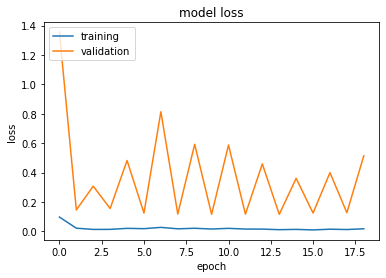

In [219]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [220]:
# performing predictions
predictions1 = model1.predict(X_test) 

# unscaling the predictions
predictions1 = scaler_y.inverse_transform(np.array(predictions1).reshape((len(predictions1), 1)))

# printing the predictions
print('Predictions:')
predictions1

Predictions:


array([[2259.6025],
       [2251.5986],
       [2284.1108],
       [2293.908 ],
       [2250.0364],
       [2234.7659],
       [2213.2798],
       [2199.332 ],
       [2165.6892],
       [2118.5547],
       [2107.903 ],
       [2043.4844],
       [2009.6176],
       [1994.3011],
       [1982.4089],
       [1946.3127],
       [1943.616 ],
       [2024.6234],
       [2049.2385],
       [2090.1045],
       [2127.4922],
       [2143.238 ],
       [2211.0068],
       [2236.164 ],
       [2261.437 ],
       [2304.3293],
       [2367.6602],
       [2411.2021],
       [2460.623 ],
       [2481.456 ],
       [2482.1382],
       [2556.7302],
       [2632.8958],
       [2689.5303],
       [2791.7754],
       [2802.179 ],
       [2842.5684],
       [2858.2717],
       [2869.5986],
       [2868.5366],
       [2929.817 ],
       [2945.0024],
       [2959.9583],
       [2939.4238],
       [2901.5967],
       [2886.3555],
       [2924.346 ],
       [2954.0833],
       [2947.0747],
       [2949.3098],


# EXECUTIVE TWEETS DATA

In [221]:
# re-reading the stock_data into pandas dataframe
stock_data = pd.read_csv('/content/drive/MyDrive/JU PROJ/ETHEREUM/EXEC_FINBERT_ETH_data.csv', index_col = False)

# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)

# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-11-09,320.884003,NaN,NaN,NaN,308.644989,329.451996,307.056000,893249984
2017-11-10,299.252991,NaN,NaN,NaN,320.670990,324.717987,294.541992,885985984
2017-11-11,314.681000,NaN,NaN,NaN,298.585999,319.453003,298.191986,842300992
2017-11-12,307.907990,NaN,NaN,NaN,314.690002,319.153015,298.513000,1613479936
2017-11-13,316.716003,NaN,NaN,NaN,307.024994,328.415009,307.024994,1041889984
...,...,...,...,...,...,...,...,...
2022-05-03,2783.476318,NaN,NaN,NaN,2857.152344,2859.193359,2762.118652,13026093219
2022-05-04,2940.644775,NaN,NaN,NaN,2783.131104,2956.686768,2779.273682,18186749944
2022-05-05,2749.213135,NaN,NaN,NaN,2940.226562,2948.960693,2704.916260,22642925048


In [222]:
stock_data.shape

(1641, 8)

In [223]:
stock_data.isna().sum()

Close          0
negative    1595
neutral     1595
positive    1595
Open           0
High           0
Low            0
Volume         0
dtype: int64

In [224]:
stock_data['negative'] = stock_data['negative'].interpolate(option='spline')
stock_data['positive'] = stock_data['positive'].interpolate(option='spline')
stock_data['neutral'] = stock_data['neutral'].interpolate(option='spline')
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-11-09,320.884003,NaN,NaN,NaN,308.644989,329.451996,307.056000,893249984
2017-11-10,299.252991,NaN,NaN,NaN,320.670990,324.717987,294.541992,885985984
2017-11-11,314.681000,NaN,NaN,NaN,298.585999,319.453003,298.191986,842300992
2017-11-12,307.907990,NaN,NaN,NaN,314.690002,319.153015,298.513000,1613479936
2017-11-13,316.716003,NaN,NaN,NaN,307.024994,328.415009,307.024994,1041889984
...,...,...,...,...,...,...,...,...
2022-05-03,2783.476318,0.056929,0.019616,0.923456,2857.152344,2859.193359,2762.118652,13026093219
2022-05-04,2940.644775,0.056929,0.019616,0.923456,2783.131104,2956.686768,2779.273682,18186749944
2022-05-05,2749.213135,0.056929,0.019616,0.923456,2940.226562,2948.960693,2704.916260,22642925048


In [225]:
stock_data.isna().sum()

Close        0
negative    98
neutral     98
positive    98
Open         0
High         0
Low          0
Volume       0
dtype: int64

In [226]:
stock_data = stock_data.dropna()

In [227]:
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2018-02-15,936.976013,0.114175,0.104217,0.781609,923.728027,951.947998,911.111023,2900100096
2018-02-16,944.210022,0.113608,0.109588,0.776804,934.786011,950.005005,917.848022,2369449984
2018-02-17,974.114990,0.113041,0.114960,0.771999,944.747986,976.594971,940.754028,2525720064
2018-02-18,923.921021,0.112474,0.120332,0.767194,973.348999,982.932983,915.445007,2567290112
2018-02-19,943.864990,0.111907,0.125704,0.762389,921.668030,957.776978,921.554016,2169019904
...,...,...,...,...,...,...,...,...
2022-05-03,2783.476318,0.056929,0.019616,0.923456,2857.152344,2859.193359,2762.118652,13026093219
2022-05-04,2940.644775,0.056929,0.019616,0.923456,2783.131104,2956.686768,2779.273682,18186749944
2022-05-05,2749.213135,0.056929,0.019616,0.923456,2940.226562,2948.960693,2704.916260,22642925048


In [228]:
stock_data.describe(include='all')

,Close,negative,neutral,positive,Open,High,Low,Volume
count,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1.543000e+03
mean,1101.638880,0.251368,0.234334,0.514299,1100.759775,1136.058144,1060.806980,1.314982e+10
std,1293.471415,0.341724,0.301291,0.350692,1293.427971,1333.445573,1247.471998,1.119144e+10
min,84.308296,0.022050,0.008353,0.041658,84.279694,85.342743,82.829887,9.484880e+08
25%,190.103821,0.029698,0.027052,0.113070,190.099060,196.909904,185.587364,4.485708e+09
50%,381.190765,0.054610,0.044328,0.443780,381.971466,391.464722,369.336334,1.064592e+10
75%,1990.353577,0.477686,0.512845,0.913204,1985.301147,2043.823425,1904.431458,1.846191e+10
max,4812.087402,0.892387,0.931472,0.951572,4810.071289,4891.704590,4718.039062,8.448291e+10


In [229]:
stock_data= stock_data.astype({"Volume":'float'})

In [230]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1543 entries, 2018-02-15 to 2022-05-07
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     1543 non-null   float64
 1   negative  1543 non-null   float64
 2   neutral   1543 non-null   float64
 3   positive  1543 non-null   float64
 4   Open      1543 non-null   float64
 5   High      1543 non-null   float64
 6   Low       1543 non-null   float64
 7   Volume    1543 non-null   float64
dtypes: float64(8)
memory usage: 108.5+ KB


In [231]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 1233
Number of records in Test Data: 310


In [232]:
stock_data['Close_EWMA3'] = stock_data['Close'].ewm(span=3, adjust=False).mean()
stock_data['Close_EWMA7'] = stock_data['Close'].ewm(span=7, adjust=False).mean()
stock_data['Close_EWMA14'] = stock_data['Close'].ewm(span=14, adjust=False).mean()
stock_data['Close_EWMA30'] = stock_data['Close'].ewm(span=30, adjust=False).mean()

stock_data['pos_EWMA3'] = stock_data['positive'].ewm(span=3, adjust=False).mean()
stock_data['pos_EWMA7'] = stock_data['positive'].ewm(span=7, adjust=False).mean()
stock_data['pos_EWMA14'] = stock_data['positive'].ewm(span=14, adjust=False).mean()
stock_data['pos_EWMA30'] = stock_data['positive'].ewm(span=30, adjust=False).mean()

stock_data['neu_EWMA3'] = stock_data['neutral'].ewm(span=3, adjust=False).mean()
stock_data['neu_EWMA7'] = stock_data['neutral'].ewm(span=7, adjust=False).mean()
stock_data['neu_EWMA14'] = stock_data['neutral'].ewm(span=14, adjust=False).mean()
stock_data['neu_EWMA30'] = stock_data['neutral'].ewm(span=30, adjust=False).mean()

stock_data['neg_EWMA3'] = stock_data['negative'].ewm(span=3, adjust=False).mean()
stock_data['neg_EWMA7'] = stock_data['negative'].ewm(span=7, adjust=False).mean()
stock_data['neg_EWMA14'] = stock_data['negative'].ewm(span=14, adjust=False).mean()
stock_data['neg_EWMA30'] = stock_data['negative'].ewm(span=30, adjust=False).mean()


# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0] #close

negative = stock_data.iloc[start:total_data,1] #neg
neutral = stock_data.iloc[start:total_data,2] #neu
positive = stock_data.iloc[start:total_data,3] #pos
open_price = stock_data.iloc[start:total_data,4] #open
high = stock_data.iloc[start:total_data,5] #high
low = stock_data.iloc[start:total_data,6] #low
volume = stock_data.iloc[start:total_data,7] #volume

ewma3_close = stock_data.iloc[start:total_data,8]#exponentially moving average 3days
ewma7_close = stock_data.iloc[start:total_data,9]#exponentially moving average 7days
ewma14_close = stock_data.iloc[start:total_data,10]#exponentially moving average 14days
ewma30_close = stock_data.iloc[start:total_data,11]#exponentially moving average 30days

ewma3_pos = stock_data.iloc[start:total_data,12]#exponentially moving average 3days
ewma7_pos = stock_data.iloc[start:total_data,13]#exponentially moving average 7days
ewma14_pos = stock_data.iloc[start:total_data,14]#exponentially moving average 14days
ewma30_pos = stock_data.iloc[start:total_data,15]#exponentially moving average 30days

ewma3_neu = stock_data.iloc[start:total_data,16]#exponentially moving average 3days
ewma7_neu = stock_data.iloc[start:total_data,17]#exponentially moving average 7days
ewma14_neu = stock_data.iloc[start:total_data,18]#exponentially moving average 14days
ewma30_neu = stock_data.iloc[start:total_data,19]#exponentially moving average 30days

ewma3_neg = stock_data.iloc[start:total_data,20]#exponentially moving average 3days
ewma7_neg = stock_data.iloc[start:total_data,21]#exponentially moving average 7days
ewma14_neg = stock_data.iloc[start:total_data,22]#exponentially moving average 14days
ewma30_neg = stock_data.iloc[start:total_data,23]#exponentially moving average 30days

In [233]:
# printing close price
print("Close Price:")
close_price

Close Price:


Date
2018-02-16     944.210022
2018-02-17     974.114990
2018-02-18     923.921021
2018-02-19     943.864990
2018-02-20     895.370972
                 ...     
2022-05-03    2783.476318
2022-05-04    2940.644775
2022-05-05    2749.213135
2022-05-06    2694.979736
2022-05-07    2636.093018
Name: Close, Length: 1542, dtype: float64

In [234]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price,
                  ewma3_close,
                  ewma7_close,
                  ewma14_close,
                  ewma30_close, 
                  close_price_shifted, 

                  positive,
                  ewma3_pos,
                  ewma7_pos,
                  ewma14_pos,
                  ewma30_pos, 

                  negative,
                  ewma3_neg,
                  ewma7_neg,
                  ewma14_neg,
                  ewma30_neg,

                  neutral,
                  ewma3_neu,
                  ewma7_neu,
                  ewma14_neu,
                  ewma30_neu, 

                  volume, 
                  open_price, 
                  high, 
                  low], 
                 axis=1)
data.columns = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-16,944.210022,940.593018,938.784515,937.940548,937.442723,974.114990,0.776804,0.779206,0.780407,0.780968,...,0.114138,0.109588,0.106902,0.105559,0.104933,0.104563,2.369450e+09,934.786011,950.005005,917.848022
2018-02-17,974.114990,957.354004,947.617134,942.763807,939.808676,923.921021,0.771999,0.775603,0.778305,0.779772,...,0.114068,0.114960,0.110931,0.107910,0.106270,0.105234,2.525720e+09,944.747986,976.594971,940.754028
2018-02-18,923.921021,940.637512,941.693106,940.251435,938.783666,943.864990,0.767194,0.771398,0.775527,0.778095,...,0.113965,0.120332,0.115632,0.111015,0.108145,0.106208,2.567290e+09,973.348999,982.932983,915.445007
2018-02-19,943.864990,942.251251,942.236077,940.733243,939.111493,895.370972,0.762389,0.766894,0.772243,0.776001,...,0.113832,0.125704,0.120668,0.114687,0.110486,0.107466,2.169020e+09,921.668030,957.776978,921.554016
2018-02-20,895.370972,918.811111,930.519801,934.684940,936.289524,849.971008,0.757584,0.762239,0.768578,0.773545,...,0.113671,0.131075,0.125872,0.118784,0.113231,0.108989,2.545260e+09,943.567017,965.265015,892.953979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-03,2783.476318,2809.244366,2835.989051,2891.003327,2966.445622,2940.644775,0.923456,0.923456,0.923456,0.923456,...,0.056923,0.019616,0.019616,0.019616,0.019616,0.019625,1.302609e+10,2857.152344,2859.193359,2762.118652
2022-05-04,2940.644775,2874.944571,2862.152982,2897.622187,2964.781051,2749.213135,0.923456,0.923456,0.923456,0.923456,...,0.056923,0.019616,0.019616,0.019616,0.019616,0.019625,1.818675e+10,2783.131104,2956.686768,2779.273682
2022-05-05,2749.213135,2812.078853,2833.918020,2877.834313,2950.873444,2694.979736,0.923456,0.923456,0.923456,0.923456,...,0.056923,0.019616,0.019616,0.019616,0.019616,0.019624,2.264293e+10,2940.226562,2948.960693,2704.916260


In [235]:
data = data.dropna()    
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-16,944.210022,940.593018,938.784515,937.940548,937.442723,974.114990,0.776804,0.779206,0.780407,0.780968,...,0.114138,0.109588,0.106902,0.105559,0.104933,0.104563,2.369450e+09,934.786011,950.005005,917.848022
2018-02-17,974.114990,957.354004,947.617134,942.763807,939.808676,923.921021,0.771999,0.775603,0.778305,0.779772,...,0.114068,0.114960,0.110931,0.107910,0.106270,0.105234,2.525720e+09,944.747986,976.594971,940.754028
2018-02-18,923.921021,940.637512,941.693106,940.251435,938.783666,943.864990,0.767194,0.771398,0.775527,0.778095,...,0.113965,0.120332,0.115632,0.111015,0.108145,0.106208,2.567290e+09,973.348999,982.932983,915.445007
2018-02-19,943.864990,942.251251,942.236077,940.733243,939.111493,895.370972,0.762389,0.766894,0.772243,0.776001,...,0.113832,0.125704,0.120668,0.114687,0.110486,0.107466,2.169020e+09,921.668030,957.776978,921.554016
2018-02-20,895.370972,918.811111,930.519801,934.684940,936.289524,849.971008,0.757584,0.762239,0.768578,0.773545,...,0.113671,0.131075,0.125872,0.118784,0.113231,0.108989,2.545260e+09,943.567017,965.265015,892.953979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,2857.410400,2835.012413,2853.493296,2907.545944,2979.064195,2783.476318,0.923456,0.923456,0.923456,0.923456,...,0.056922,0.019616,0.019616,0.019616,0.019616,0.019626,1.860974e+10,2827.614014,2874.145996,2785.522949
2022-05-03,2783.476318,2809.244366,2835.989051,2891.003327,2966.445622,2940.644775,0.923456,0.923456,0.923456,0.923456,...,0.056923,0.019616,0.019616,0.019616,0.019616,0.019625,1.302609e+10,2857.152344,2859.193359,2762.118652
2022-05-04,2940.644775,2874.944571,2862.152982,2897.622187,2964.781051,2749.213135,0.923456,0.923456,0.923456,0.923456,...,0.056923,0.019616,0.019616,0.019616,0.019616,0.019625,1.818675e+10,2783.131104,2956.686768,2779.273682


In [236]:
# setting the target variable as the shifted close_price
y = data['close_price_shifted']
y

Date
2018-02-16     974.114990
2018-02-17     923.921021
2018-02-18     943.864990
2018-02-19     895.370972
2018-02-20     849.971008
                 ...     
2022-05-02    2783.476318
2022-05-03    2940.644775
2022-05-04    2749.213135
2022-05-05    2694.979736
2022-05-06    2636.093018
Name: close_price_shifted, Length: 1541, dtype: float64

In [237]:
# setting the features dataset for prediction  
cols = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
x = data[cols]
x

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-16,944.210022,940.593018,938.784515,937.940548,937.442723,974.114990,0.776804,0.779206,0.780407,0.780968,...,0.114138,0.109588,0.106902,0.105559,0.104933,0.104563,2.369450e+09,934.786011,950.005005,917.848022
2018-02-17,974.114990,957.354004,947.617134,942.763807,939.808676,923.921021,0.771999,0.775603,0.778305,0.779772,...,0.114068,0.114960,0.110931,0.107910,0.106270,0.105234,2.525720e+09,944.747986,976.594971,940.754028
2018-02-18,923.921021,940.637512,941.693106,940.251435,938.783666,943.864990,0.767194,0.771398,0.775527,0.778095,...,0.113965,0.120332,0.115632,0.111015,0.108145,0.106208,2.567290e+09,973.348999,982.932983,915.445007
2018-02-19,943.864990,942.251251,942.236077,940.733243,939.111493,895.370972,0.762389,0.766894,0.772243,0.776001,...,0.113832,0.125704,0.120668,0.114687,0.110486,0.107466,2.169020e+09,921.668030,957.776978,921.554016
2018-02-20,895.370972,918.811111,930.519801,934.684940,936.289524,849.971008,0.757584,0.762239,0.768578,0.773545,...,0.113671,0.131075,0.125872,0.118784,0.113231,0.108989,2.545260e+09,943.567017,965.265015,892.953979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,2857.410400,2835.012413,2853.493296,2907.545944,2979.064195,2783.476318,0.923456,0.923456,0.923456,0.923456,...,0.056922,0.019616,0.019616,0.019616,0.019616,0.019626,1.860974e+10,2827.614014,2874.145996,2785.522949
2022-05-03,2783.476318,2809.244366,2835.989051,2891.003327,2966.445622,2940.644775,0.923456,0.923456,0.923456,0.923456,...,0.056923,0.019616,0.019616,0.019616,0.019616,0.019625,1.302609e+10,2857.152344,2859.193359,2762.118652
2022-05-04,2940.644775,2874.944571,2862.152982,2897.622187,2964.781051,2749.213135,0.923456,0.923456,0.923456,0.923456,...,0.056923,0.019616,0.019616,0.019616,0.019616,0.019625,1.818675e+10,2783.131104,2956.686768,2779.273682


In [238]:
from sklearn.preprocessing import StandardScaler
# scaling the feature dataset

scaler_x = StandardScaler ()
x = np.array(x).reshape((len(x) ,len(cols)))

# scaling the target variable
scaler_y = StandardScaler ()
y = np.array (y).reshape ((len( y), 1))

# displaying the scaled feature dataset and the target variable
x, y

(array([[ 944.21002197,  940.59301758,  938.78451538, ...,  934.78601074,
          950.00500488,  917.84802246],
        [ 974.11499023,  957.35400391,  947.61713409, ...,  944.74798584,
          976.5949707 ,  940.75402832],
        [ 923.92102051,  940.63751221,  941.6931057 , ...,  973.34899902,
          982.9329834 ,  915.44500732],
        ...,
        [2940.64477539, 2874.94457066, 2862.15298241, ..., 2783.13110352,
         2956.68676758, 2779.27368164],
        [2749.21313477, 2812.07885271, 2833.9180205 , ..., 2940.2265625 ,
         2948.96069336, 2704.91625977],
        [2694.97973633, 2753.52929452, 2799.18344946, ..., 2748.93164062,
         2754.83764648, 2645.33520508]]), array([[ 974.11499023],
        [ 923.92102051],
        [ 943.86499023],
        ...,
        [2749.21313477],
        [2694.97973633],
        [2636.09301758]]))

In [239]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (1233, 25) and y: (1233, 1)
Number of rows and columns in the Test set X: (307, 25) and y: (307, 1)


In [240]:
sc = scaler_x.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

sc = scaler_y.fit(y_train)
y_train = sc.transform(y_train)
y_test = sc.transform(y_test)

In [241]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (1233, 25, 1)
Shape of Test set X: (307, 25, 1)


# MODEL FOR EXECUTIVE TWEETS

In [242]:
# setting the seed to achieve consistent and less random predictions at each execution
import tensorflow as tf 
import random
import os
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
initializer = tf.keras.initializers.GlorotNormal()
# setting the model architecture
model2=Sequential()
model2.add((GRU(250,return_sequences=True,activation='tanh',kernel_initializer=initializer,input_shape=(len(cols),1))))
model2.add(Dropout(0.4))
model2.add((GRU(200,return_sequences=True,activation='tanh')))
model2.add(Dropout(0.4))
model2.add((GRU(150,activation='tanh', return_sequences=True)))
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(1, activation = 'linear'))

# printing the model summary
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_21 (GRU)                (None, 25, 250)           189750    
                                                                 
 dropout_21 (Dropout)        (None, 25, 250)           0         
                                                                 
 gru_22 (GRU)                (None, 25, 200)           271200    
                                                                 
 dropout_22 (Dropout)        (None, 25, 200)           0         
                                                                 
 gru_23 (GRU)                (None, 25, 150)           158400    
                                                                 
 dropout_23 (Dropout)        (None, 25, 150)           0         
                                                                 
 flatten_7 (Flatten)         (None, 3750)             

In [243]:
import tensorflow as tf

model2.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, \
    restore_best_weights=True)]

history = model2.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=16,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/100
70/70 [==============================] - 15s 139ms/step - loss: 0.1002 - val_loss: 1.4794
Epoch 2/100
70/70 [==============================] - 9s 124ms/step - loss: 0.0987 - val_loss: 0.9244
Epoch 3/100
70/70 [==============================] - 9s 127ms/step - loss: 0.0333 - val_loss: 0.5506
Epoch 4/100
70/70 [==============================] - 9s 126ms/step - loss: 0.0138 - val_loss: 0.1441
Epoch 5/100
70/70 [==============================] - 9s 127ms/step - loss: 0.0087 - val_loss: 0.1534
Epoch 6/100
70/70 [==============================] - 9s 124ms/step - loss: 0.0098 - val_loss: 0.1082
Epoch 7/100
70/70 [==============================] - 9s 125ms/step - loss: 0.0083 - val_loss: 0.1446
Epoch 8/100
70/70 [==============================] - 9s 130ms/step - loss: 0.0073 - val_loss: 0.1086
Epoch 9/100
70/70 [==============================] - 9s 131ms/step - loss: 0.0079 - val_loss: 0.1189
Epoch 10/100
70/70 [==============================] - 9s 127ms/step - loss: 0.0078 - val_l

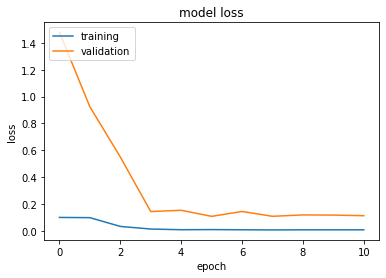

In [244]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [245]:
# performing predictions
predictions2 = model2.predict(X_test) 

# unscaling the predictions
predictions2 = scaler_y.inverse_transform(np.array(predictions2).reshape((len(predictions2), 1)))

# printing the predictions
print('Predictions:')
predictions2

Predictions:


array([[2234.954 ],
       [2228.6758],
       [2262.8896],
       [2260.9392],
       [2209.0923],
       [2190.479 ],
       [2166.344 ],
       [2149.5396],
       [2111.852 ],
       [2065.9507],
       [2054.0366],
       [2016.0298],
       [1988.0037],
       [1974.7362],
       [1960.594 ],
       [1923.7697],
       [1924.0206],
       [1991.0032],
       [2023.3396],
       [2070.8042],
       [2111.6616],
       [2131.7412],
       [2200.0015],
       [2217.0786],
       [2235.1338],
       [2275.4797],
       [2336.7722],
       [2379.7976],
       [2428.373 ],
       [2448.6594],
       [2457.4788],
       [2539.2715],
       [2618.7615],
       [2683.0286],
       [2787.0967],
       [2801.112 ],
       [2858.4192],
       [2879.545 ],
       [2893.2065],
       [2897.633 ],
       [2961.1995],
       [2975.925 ],
       [2989.8853],
       [2957.3284],
       [2919.405 ],
       [2908.4314],
       [2950.1685],
       [2992.4072],
       [2990.8047],
       [2999.1626],


# Unscaling

In [246]:
# unscaling the test feature dataset, x_test
# unscaling the test y dataset, y_test+
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

# Comparision

###  Plotting

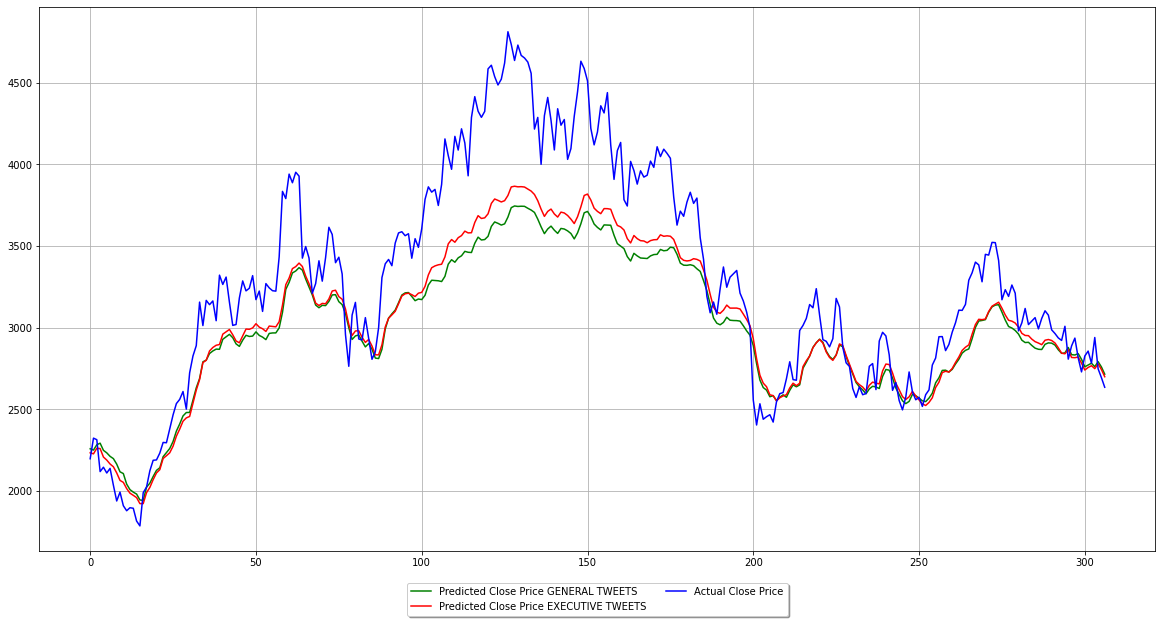

In [247]:

plt.figure(figsize=(20,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions1,'-g', label="Predicted Close Price GENERAL TWEETS")
plt.plot(predictions2,'-r', label="Predicted Close Price EXECUTIVE TWEETS")
plt.plot([row[0] for row in y_test],color = 'b', label="Actual Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.grid()
plt.show()


### Mean Absolute Error

In [248]:
from sklearn.metrics import mean_absolute_error

print("MAE general",mean_absolute_error(y_test,predictions1))
print("MAE executive",mean_absolute_error(y_test,predictions2))

MAE general 315.07515515256006
MAE executive 278.50726576814435


### MSE and RMSE SCORE

In [249]:
from sklearn.metrics import mean_squared_error
from math import sqrt

MSE1 = np.square(np.subtract(y_test,predictions1)).mean() 
MSE2 = np.square(np.subtract(y_test,predictions2)).mean() 

print("MSE general",MSE1)
print("MSE executive",MSE2)

RMSE1 = MSE1
RMSE2 = MSE2

print('Root Mean Square Error General Tweets (sklearn.metrics) =', round(np.sqrt(RMSE1),4))
print('Root Mean Square Error Executive Tweets (sklearn.metrics) =', round(np.sqrt(RMSE2),4))

MSE general 166341.30804458619
MSE executive 127187.75520828631
Root Mean Square Error General Tweets (sklearn.metrics) = 407.8496
Root Mean Square Error Executive Tweets (sklearn.metrics) = 356.6339


### R2

In [250]:
from sklearn.metrics import r2_score
r2 =[ r2_score(y_test,predictions1), r2_score(y_test,predictions2)]
print('R2 general',r2[0])
print('R2 executive',r2[1])

R2 general 0.6415414953254945
R2 executive 0.7259157506886444


### MAPE

In [251]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
    
print("MAPE General",MAPE(y_test,predictions1), "%")
print("MAPE Executive",MAPE(y_test,predictions2), "%")

MAPE General 8.663765893458766 %
MAPE Executive 7.724879434033909 %


### Conclusion
 General Tweets can affect the stock market better than Executive Tweets

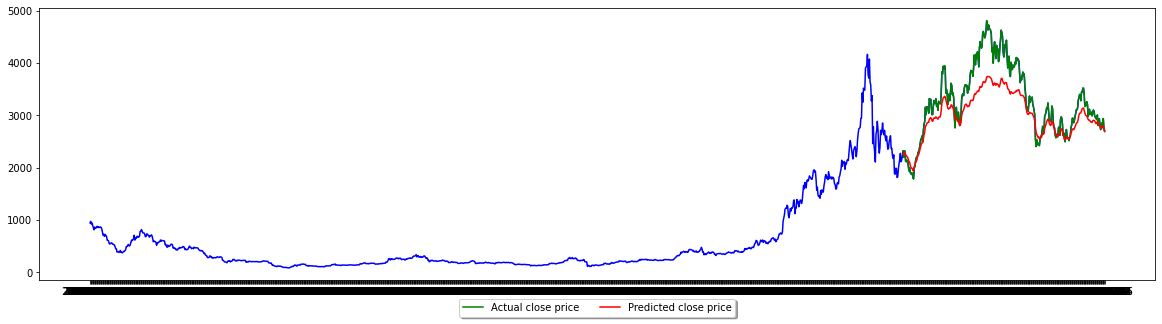

In [252]:
val = data[len(y_train)+1:]
val['pred'] = predictions1
plt.figure(figsize = (20,5))
plt.plot(data['close_price'], color = 'b')
plt.plot(val['close_price'], label = 'Actual close price', color = 'g')
plt.plot(val['pred'], label = 'Predicted close price', color = 'r')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()